In [1]:
import re
import numpy as np
from functools import reduce
from collections import defaultdict
from itertools import permutations
from copy import deepcopy
from string import ascii_uppercase, ascii_lowercase

def find_nums(s, neg = False):
    if neg:
        return re.findall(r'-?\d+', s)
    return re.findall(r'\d+', s)

In [737]:
# 1

def count_fuel(weight):
    weight = weight // 3 - 2
    if weight > 0: return weight + count_fuel(weight)
    return 0

def fueling(data):
    weights = [max((int(d) // 3) - 2, 0) for d in data]
    fuels = sum([count_fuel(x) for x in weights])
    print(sum(weights), sum(weights) + fuels)

with open('data/1') as f:
    fueling(f.read().split('\n'))


3252897 4876469


In [738]:
# 2

def opcodes(d, p1=True):
    for x in range(100):
        for y in range(100):
            data = [*(map(int, d))]
            data[1] = x
            data[2] = y
            i = 0
            while True:
                if i > len(data) - 3:
                    op, f, s, res = data[i:i + 4] + data[:((i + 4) % len(data))]
                else:
                    op, f, s, res = data[i:i+4]
                newpos = int(res) % int(len(data))
                if op == 99:
                    if p1:
                        print(data[0])
                        return
                    else:
                        if data[0] == 19690720:
                            print(x, y)
                            return
                    break
                elif op == 1:
                    data[newpos] = data[f] + data[s]
                elif op == 2:
                    data[newpos] = data[f] * data[s]

                i = (i + 4) % len(data)

with open('data/2') as f:
    lines = f.read().split(',')
    opcodes(lines)
    opcodes(lines, False)

490699
64 21


In [739]:
# 3

def wire_crossing(lines):
    intersects = set([])
    points = [{},{}]
    dx = {'L': -1, 'R': 1, 'U': 0, 'D': 0}
    dy = {'L': 0, 'R': 0, 'U': 1, 'D': -1}
    for i, line in enumerate(lines):
        x=y=0
        directions = line.split(',')
        curr_dist = 0
        for d in directions:
            length = int(find_nums(d)[0])
            di = d[0]
            for j in range(length):
                x += dx[di]
                y += dy[di]
                curr_dist += 1
                
                if (x, y) not in points[i]:
                    points[i][(x, y)] = curr_dist
                    if i == 1 and (x, y) in points[0]:
                        intersects.add((x, y, points[1][(x, y)] + points[0][(x, y)]))
                        
    print(sorted([abs(p[0]) + abs(p[1]) for p in intersects])[0])
    print(sorted([abs(p[2]) for p in intersects])[0])
                
with open('data/3') as f:
    lines = f.readlines()
    wire_crossing(lines)
    

1017
11432


In [740]:
# 4
def passswordssses(nums):
    start, end = [int(x) for x in nums]
    valid_password = 0
    for i in range(start, end + 1):
        i = [*str(i)]
        first,second,third,fourth,fifth,sixth = i
        if first <= second <= third <= fourth <= fifth <= sixth:
            counts = defaultdict(int)
            for c in i:
                counts[c] += 1
            valid_password += any([v == 2 for v in counts.values()])

    print(valid_password)
    
with open('data/4') as f:
    lines = f.read().split('-')
    passswordssses(lines)
    

1148


In [741]:
# 5

with open('data/5') as f:
    params = [int(c) for c in f.read().split(',')]
    i = 0
    while True:
        op = '0' * (5 - len(str(params[i]))) + str(params[i])
        opcode = op[-2:]
        p_types = [c for c in reversed('0' * (5 - len(op)) + op[:-2])]
        get_param = lambda mode, pos: params[pos] if mode == '1' else params[params[pos]]

        if opcode == '04':
            print('Output:', get_param(p_types[0], i + 1))
            i += 2
        elif opcode == '05':
            p1 = get_param(p_types[0], i + 1)
            if p1:
                i = get_param(p_types[1], i + 2)
            else:
                i += 3
        elif opcode == '06':
            p1 = get_param(p_types[0], i + 1)
            if p1 == 0:
                i = get_param(p_types[1], i + 2)
            else:
                i += 3
        elif opcode == '07':
            p1, p2, p3 = get_param(p_types[0], i + 1), get_param(p_types[1], i + 2), get_param(p_types[2], i + 3)
            params[params[i + 3]] = int(p1 < p2)
            i += 4
        elif opcode == '08':
            p1, p2, p3 = get_param(p_types[0], i + 1), get_param(p_types[1], i + 2), get_param(p_types[2], i + 3)
            params[params[i + 3]] = int(p1 == p2)
            i += 4
        elif opcode == '03':
            param = int(input())
            params[params[i + 1]] = param
            i += 2
        elif opcode == '99':
            print('EXITING', params[0])
            break
        elif opcode == '01':
            params[params[i + 3]] = get_param(p_types[0], i + 1) + get_param(p_types[1], i + 2)
            i += 4
        elif opcode == '02':
            params[params[i + 3]] = get_param(p_types[0], i + 1) * get_param(p_types[1], i + 2)
            i += 4
        else:
            print("ERROR ERROR ERROR ERROR !!!!!!!!!!!!!!!!!!!!!!!!!")

            
        

 1


Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 9775037
EXITING 3


In [742]:
# 6

class Node:
    def __init__(self, val):
        self.parents = []
        self.children = []
        self.val = val

def recurse_tree(node, depth):
    total = depth
    for n in node.children:
        total += recurse_tree(n, depth + 1)
    return total
        
def finders_keepers(data):
    nodes = {}
    directs = 0
    
    for target, orbiter in [d.split(')') for d in data]:
        if target not in nodes:
            nodes[target] = Node(target)
        if orbiter not in nodes:
            nodes[orbiter] = Node(orbiter)
        nodes[target].children += [nodes[orbiter]]
        nodes[orbiter].parents += [nodes[target]]
        directs += 1
        
    for n in nodes.values():
        if len(n.parents) == 0:
            for node in n.children:
                indirects = recurse_tree(node, 0)
                
    print(directs + indirects)
    
    queue = [(n, 1) for n in nodes['YOU'].children + nodes['YOU'].parents]
    visited = set(queue)
    while len(queue) > 0:
        curr, dist = queue.pop(0)
        if curr.val == 'SAN':
            print(dist - 2)
            break
        for n in curr.children + curr.parents:
            if n not in visited:
                queue += [(n, dist + 1)]
            
        visited.add(curr)
            

with open('data/6') as f:
    lines = f.read().split('\n')
    finders_keepers(lines)

300598
520


In [749]:
# 7

class Program:
    def __init__(self, ip, state):
        self.ip = ip
        self.state = state
        self.i = 0
        self.inputs = [ip]
        
    def add_input(self, val):
        self.inputs += [val]
        
    def step(self):
        while True:
            op = '0' * (5 - len(str(self.state[self.i]))) + str(self.state[self.i])
            opcode = op[-2:]
            p_types = [c for c in reversed('0' * (5 - len(op)) + op[:-2])]
            get_param = lambda mode, pos: self.state[pos] if mode == '1' else self.state[self.state[pos]]

            if opcode == '04':
                out = get_param(p_types[0], self.i + 1)
                self.i += 2
                return out
            elif opcode == '05':
                p1 = get_param(p_types[0], self.i + 1)
                if p1:
                    self.i = get_param(p_types[1], self.i + 2)
                else:
                    self.i += 3
            elif opcode == '06':
                p1 = get_param(p_types[0], self.i + 1)
                if p1 == 0:
                    self.i = get_param(p_types[1], self.i + 2)
                else:
                    self.i += 3
            elif opcode == '07':
                p1, p2, p3 = get_param(p_types[0], self.i + 1), get_param(p_types[1], self.i + 2), get_param(p_types[2], self.i + 3)
                self.state[self.state[self.i + 3]] = int(p1 < p2)
                self.i += 4
            elif opcode == '08':
                p1, p2, p3 = get_param(p_types[0], self.i + 1), get_param(p_types[1], self.i + 2), get_param(p_types[2], self.i + 3)
                self.state[self.state[self.i + 3]] = int(p1 == p2)
                self.i += 4
            elif opcode == '03':
                param = self.inputs.pop(0)
                self.state[self.state[self.i + 1]] = param
                self.i += 2
            elif opcode == '99':
                return 'EXIT'
            elif opcode == '01':
                self.state[self.state[self.i + 3]] = get_param(p_types[0], self.i + 1) + get_param(p_types[1], self.i + 2)
                self.i += 4
            elif opcode == '02':
                self.state[self.state[self.i + 3]] = get_param(p_types[0], self.i + 1) * get_param(p_types[1], self.i + 2)
                self.i += 4
            else:
                print("ERROR ERROR ERROR ERROR !!!!!!!!!!!!!!!!!!!!!!!!!", len(self.state), self.state)
                return 'ERROR'
            
def solverson(data):
    data = [int(c) for c in data.split(',')]
    
    rec = 0
    for inputs in permutations(range(5, 10), 5):
        val = 0
        state = [Program(inputs[v], deepcopy(data)) for v in range(5)]
        while True:
            for program in state:
                program.add_input(val)
                returned = program.step()
                val = returned
            if returned == 'EXIT':
                break
            rec = max(rec, val)
    print(rec)

with open('data/7') as f:
    lines = f.read()
    solverson(lines)

61019896


1596


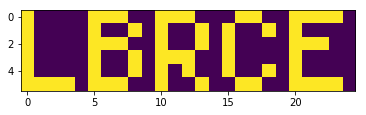

In [744]:
# 8

import matplotlib.pyplot as plt

def eight(data, l, w):
    arr = np.array([int(c) for c in data]).reshape((l,w,len(data) // (l * w)))
    curr = []
    best_sum= float('inf')
    bs = []
    for ind, i in enumerate((data)):
        curr += [int(i)]
        mod = ind % (w * l)

        if mod == l * w- 1:
            arr[:,:,ind // (l * w)] = np.array(curr).reshape(l,w)
            if sum([c == 0 for c in curr]) < best_sum:
                bs = curr
                best_sum = sum([c == 0 for c in curr])
            curr = []
            
    print(sum([c == 1 for c in bs]) * sum([c == 2 for c in bs]))
    
    img = np.zeros((l, w))
    for y in range(l):
        for x in range(w):
            img[y, x] = 2
            for pix in range(len(data) // (l * w)):
                if arr[y, x, pix] != 2:
                    img[y, x] = arr[y, x, pix]
                    break
    plt.imshow(img)
    plt.show()
    
with open('data/8') as f:
    lines = f.read()
    eight(lines, 6,25)

In [2]:
# 9
class Program:
    def __init__(self, inputs, state, start=None):
        self.state = state + [0] * (10000 - len(state))
        self.i = 0
        self.inputs = inputs
        self.rb = 0
        if start:
            self.state[0] = start
        
    def add_input(self, val):
        self.inputs += [val]
        
    
    def set_input(self, val):
        self.inputs = [val]
        
    def step(self):
        while True:
            op = '0' * (5 - len(str(self.state[self.i]))) + str(self.state[self.i])
            opcode = op[-2:]
            p_types = [c for c in reversed('0' * (5 - len(op)) + op[:-2])]

            def get_param(mode, pos):
                if mode == '1':
                    return self.state[pos]
                if mode == '0':
                    return self.state[self.state[pos]]
                return self.state[self.state[pos] + self.rb]

            if opcode == '04':
                out = get_param(p_types[0], self.i + 1)
                self.i += 2
                return out
            elif opcode == '09':
                self.rb += get_param(p_types[0], self.i + 1)
                self.i += 2
            elif opcode == '05':
                p1 = get_param(p_types[0], self.i + 1)
                if p1:
                    self.i = get_param(p_types[1], self.i + 2)
                else:
                    self.i += 3
            elif opcode == '06':
                p1 = get_param(p_types[0], self.i + 1)
                if p1 == 0:
                    self.i = get_param(p_types[1], self.i + 2)
                else:
                    self.i += 3
            elif opcode == '07':
                p1, p2, p3 = get_param(p_types[0], self.i + 1), get_param(p_types[1], self.i + 2), get_param(p_types[2], self.i + 3)
                
                if p_types[2] == '2':
                    self.state[self.state[self.i + 3] + self.rb] = int(p1 < p2)
                else:
                    self.state[self.state[self.i + 3]] = int(p1 < p2)
                self.i += 4
            elif opcode == '08':
                p1, p2, p3 = get_param(p_types[0], self.i + 1), get_param(p_types[1], self.i + 2), get_param(p_types[2], self.i + 3)
                
                if p_types[2] == '2':
                    self.state[self.state[self.i + 3] + self.rb] = int(p1 == p2)
                else:
                    self.state[self.state[self.i + 3]] = int(p1 == p2)
                self.i += 4
            elif opcode == '03':
                param = self.inputs.pop(0)
                if p_types[0] == '2':
                    self.state[self.state[self.i + 1] + self.rb] = param
                else:
                    self.state[self.state[self.i + 1]] = param
                self.i += 2
            elif opcode == '99':
                self.i += 1
                return 'EXIT'
            elif opcode == '01':
                
                if p_types[2] == '2':
                    self.state[self.state[self.i + 3] + self.rb] = get_param(p_types[0], self.i + 1) + get_param(p_types[1], self.i + 2)
                else:
                    self.state[self.state[self.i + 3]] = get_param(p_types[0], self.i + 1) + get_param(p_types[1], self.i + 2)
                
                self.i += 4
            elif opcode == '02':
                if p_types[2] == '2':
                    self.state[self.state[self.i + 3] + self.rb] = get_param(p_types[0], self.i + 1) * get_param(p_types[1], self.i + 2)
                else:
                    self.state[self.state[self.i + 3]] = get_param(p_types[0], self.i + 1) * get_param(p_types[1], self.i + 2)
            
                self.i += 4
            else:
                print("ERROR ERROR ERROR ERROR !!!!!!!!!!!!!!!!!!!!!!!!!", self.i, opcode, op, self.state[self.i:self.i+10])
                return 'ERROR'

def nine(lines):
    prog = Program([1], lines)
    print(prog.step())
    
with open('data/9') as f:
    lines = f.read()
    nine([int(x) for x in lines.split(',')])

2752191671


In [ ]:
# 10

def get_dist(x, y):
    return abs(x[0] - y[0]) + abs(x[1] - y[1])
        
def get_angle(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    x_diff, y_diff = x1 - x2, y1 - y2
    
    vec_norm_base = np.array([0, 1])
    vec_norm = np.array([x_diff, y_diff]) / np.linalg.norm([x_diff, y_diff])
    dot = np.dot(vec_norm, vec_norm_base)
    
    angle = np.arccos(np.clip(dot, -1.0, 1.0))*360/(2*np.pi)
    if dot == 0:
        return 90 if vec_norm[0] > 0 else 270
    else:
        if vec_norm[0] >= 0:
            return round(((180 - angle) + 180) % 360, 8)
        else:
            return round(angle % 360, 8)

def ten(lines):
    points, asteroids = (lines.split('\n')), set([])
    a_x=a_y=s=best=besti=0
    for y in range(len(points)):
        for x in range(len(points[0])):
            if points[y][x] == '#':
                asteroids.add((x, y))
                
    for a_x, a_y in asteroids:
        num = 0
        for a_ox, a_oy in asteroids ^ set([(a_x, a_y)]):
            x_diff, y_diff, valid = (a_x - a_ox), (a_y - a_oy), True
            vec_norm = np.array([x_diff, y_diff]) / np.linalg.norm([x_diff, y_diff])
            for x_c in range(1, abs(x_diff)):
                if x_diff > 0:
                    vec = -x_c/vec_norm[0] * vec_norm + np.array([a_x, a_y])
                else:
                    vec = x_c/vec_norm[0] * vec_norm + np.array([a_x, a_y])
                if (vec[0], vec[1]) in asteroids:
                    valid = False
            for y_c in range(1, abs(y_diff)):
                if y_diff > 0:
                    vec = -y_c/vec_norm[1] * vec_norm + np.array([a_x, a_y])
                else:
                    vec = y_c/vec_norm[1] * vec_norm + np.array([a_x, a_y])
                if (vec[0], vec[1]) in asteroids:
                    valid = False
            num += valid
        if num > best:
            besti = (a_x, a_y)
        best = max(best, num)
        
    print(best, besti)
    s = besti
    asteroids.remove(s)
    angles, a_dict = set([]), {}
    for a in asteroids:
        ang = get_angle(s, a)
        angles.add(ang)
        a_dict[ang] = a_dict.get(ang, []) + [(get_dist(s, a), a[0], a[1])]
        
    for ang in angles:
        a_dict[ang] = sorted(a_dict[ang])
    
    angles, removed = sorted(angles), 0
    while len(asteroids) > 0:
        for angle in angles:
            curr = a_dict[angle]
            if len(curr) > 0:
                d, x, y = curr.pop(0)
                asteroids.remove((x, y))
                removed += 1
                if removed == 200:
                    print(x, y, 100 * x + y)
    
with open('data/10') as f:
    lines = f.read()
    ten(lines)

249


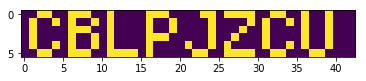

In [747]:
# 11

def elva(lines):
    commands = [int(x) for x in lines.split(',')]
    d = {0: (-1, 0), 1: (0, 1), 2: (1, 0), 3: (0, -1)}
    paints = {(0, 0): 1}
    prog = Program([], commands)
    y=x=direction=0
    
    points = set([])
    
    while True:
        prog.add_input(paints.get((y,x), 0))
        col = prog.step()
        if col == 'EXIT':
            break
        paints[(y,x)] = col
        step = prog.step()
        if step == 'EXIT':
            break
        if step == 0:
            direction = (direction - 1) % 4
        else:
            direction = (direction + 1) % 4
            
        x,y = d[direction][1] + x, d[direction][0] + y
        points.add((y, x))
        
    arr = np.zeros((6, 43))
    
    for pos, c in paints.items():
        arr[pos[0], pos[1]] = c
    
    print(len(paints.keys()))
        
    plt.imshow(arr)
    plt.show()

with open('data/11') as f:
    lines = f.read()
    elva(lines)

In [798]:

def my_nth_body(data):
    moons = np.array([[*map(int, find_nums(x, True))] for x in data.split('\n')])
    vels = np.array([[0,0,0] for x in range(len(moons))])
    history = {0: {}, 1: {}, 2: {}}
    counts = {0: True, 1: True, 2: True}
    matches, base, time = 0, 1, 0
    
    while matches < 3:
        if time == 1000:
            print(sum(np.sum(np.abs(moons), axis=1) *  np.sum(np.abs(vels), axis=1)))
            
        vels += np.sum(np.sign(moons - moons[:, np.newaxis]), axis=1)
        moons += vels
            
        curr = {0: [], 1: [], 2: []}
        for ind in range(4):
            for j in range(3):
                curr[j] += [moons[ind][j], vels[ind][j]]
        for k in curr:
            curr[k] = tuple(curr[k])
            
        for i in range(3):
            if curr[i] in history[i]:
                if counts[i]:
                    base = time * base // math.gcd(time, base)
                    matches += 1
                    print(time)
                counts[i] = False
            history[i][curr[i]] = time
        time += 1
    print(base)

    
with open('data/12') as f:
    lines = f.read()
    my_nth_body(lines)

6735
161428
167624
193052
326489627728984


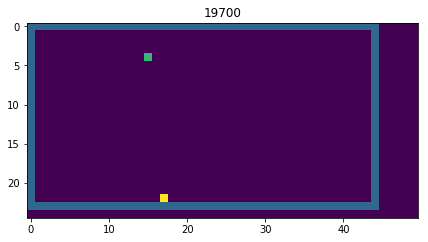

Score:  13824
p1 296


In [962]:
# 13

from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.imshow(data)
    plt.title(title)
    plt.show();

def destroyer(data):
    prog = Program([0], [int(x) for x in data.split(',')], 2)
    stuff = {}
    game = np.zeros((25, 50))
    empty, wall, block, paddle, ball = 0,1,2,3,4
    paddle_pos = None
    ball_pos = None
    ball_delta = (0, 0)
    time = 0
    p1 = 0
    while True:
        if (paddle_pos == None) ^ (ball_pos == None):
            p1 = (np.sum(game == 2))
        time += 1
        x = prog.step()
        y = prog.step()
        t = prog.step()
        if x == -1 and y == 0 and np.sum(game == block) == 0:
            print('Score: ', t)
            break
        else:
            if t == ball:
                if ball_pos:
                    ball_delta = (x - ball_pos[0], ball_pos[1] - y)
                ball_pos = (x, y)
            if t == paddle:
                paddle_pos = (x, y)
            if paddle_pos and ball_pos:
                diff = np.int(ball_pos[0] + ball_delta[0] - paddle_pos[0] - np.sum(prog.inputs)) 
                prog.set_input(int(np.sign(diff)))
            if x != -1:
                game[y, x] = t
                
        if time % 10 == 0:
            live_plot(game, title=time)

    print('p1', p1)
with open('data/13') as f:
    lines = f.read()
    destroyer(lines)

In [1335]:
# 15
dirs = {
    'E': np.array((1, 0)),
    'W': np.array((-1, 0)),
    'S': np.array((0, 1)),
    'N': np.array([0, -1])
}
inps = {
    'E': 4,
    'W': 3,
    'S': 2,
    'N': 1
}

opps = {
    'E': 3,
    'W': 4,
    'S': 1,
    'N': 2
}

def draw_map(area):
    small_x = min([x[0] for x in area.keys()])
    small_y = min([x[1] for x in area.keys()])
    big_x = max([x[0] for x in area.keys()])
    big_y = max([x[1] for x in area.keys()])
    draw = [[' ' ] *  (abs(big_x - small_x) + 5) for _ in range(abs(big_y - small_y) + 3)]
    
    for pos, val in area.items():
        pos = [pos[0], pos[1]]
        orig = area.get(tuple(pos))
        pos[0] += abs(small_x)
        pos[1] += abs(small_y)
        
        if val == 1:
            draw[pos[1]][pos[0]] = '.'
        elif val == 0:
            draw[pos[1]][pos[0]] = '#'
        elif val == 2:
            draw[pos[1]][pos[0]] = 'X'
            
    draw[small_y][small_x] = 'o'
    for y in range(len(draw)):
        for x in range(len(draw[0])):
            print(draw[y][x], end='')
        print()

def dfs(pos, area, visited, prog, tot = 0):
    for node in ['S', 'N', 'W', 'E']:
        new_pos = pos + dirs[node]
        if tuple(new_pos) not in visited:
            visited.add(tuple(new_pos))
            prog.set_input(inps[node])
            res = prog.step()
            area[tuple(new_pos)] = res
            if res == 2:
                print('tot', tot + 1)
            if res == 1 or res == 2:
                dfs(new_pos, area, visited, prog, tot + 1)
                prog.set_input(opps[node])
                prog.step()

def fifeteen(data):
    area = {}
    pos = (0, 0)
    prog = Program([], [int(x) for x in data.split(',')])
    
    dfs(np.array(pos), area, set([]), prog)
#     draw_map(area)
    points = [(np.array((0, 0)), 0)]
    visited = set(())
    found = False
    
    while len(points) > 0:
        curr, dist = points.pop(0)
        if tuple(curr) not in visited and not found:
            visited.add(tuple(curr))
            if area.get(tuple(curr)) == 2:
                print('foundit ', curr, dist)
            for node in ['E', 'W', 'N', 'S']:
                new_pos = curr + dirs[node]

                if tuple(new_pos) not in visited and area.get(tuple(new_pos)) in [1, 2] :
                    points.append((new_pos, dist + 1))
                    
                
    draw_map(area)
    points = [(np.array(oxy), 0)]
    visited = set(())
    biggest = 0
    
    oxy = [(k, v) for k, v in area.items() if v == 2][0][0]
    
    while len(points) > 0:
        curr, dist = points.pop(0)
        if tuple(curr) not in visited and not found:
            visited.add(tuple(curr))
            biggest = max(biggest, dist)
            for node in ['E', 'W', 'N', 'S']:
                new_pos = curr + dirs[node]

                if tuple(new_pos) not in visited and area.get(tuple(new_pos)) in [1, 2] :
                    points.append((new_pos, dist + 1))
    print(biggest)

with open('data/15') as f:
    fifeteen(f.read())

tot 238
foundit  [-16  14] 238
 ######### ####### ################# ###     
#.........#.......#.................#...#    
#.#.#####.#####.#.#.#############.#.#.#.#    
#.#.....#.......#.#...#...#...#...#.#.#.#    
#.#####.#.###########.#.#.#.#.#.## ##.#.#    
#...#...#.#.........#...#...#.#...#...#.#    
 ##.#.###.#.#####.###########.###.#.###.#    
#.#.#.#...#.#...#.........#.#...#.#...#.#    
#.#.#.#.###.###.#######.#.#.###.#.###.#.#    
#.#.#.#...#.....#.....#.#.....#.#...#.#.#    
#.#.#.#.#######.###.###.#.#####.#.###.#.#    
#.#.#.#.#...........#...#.#.....#.....#.#    
#.#.#.###.###########.#####.###########.#    
#...#...........#...#.#.......#.....#...#    
#.#####.#########.#.#.#.#####.#.###.#.#.#    
#.#...#.#.........#.#...#...#.#.#.....#.#    
 ##.#.###.#########.#####.#.###.#.#####.#    
#...#...........#...#.....#...#.#.#...#.#    
#.## ##########.#.###.#######.#.###.#.##     
#...#.#.......#.#.....#.......#.....#...#    
 ##.#.#.#####.#########.###########.###.#    
#.#

In [58]:
# six ten

base_pattern = [0, 1, 0, -1]

def eXXXXtreme_sLOW_no_mo(nums):
    mat = np.array([(base_pattern * (len(nums) // 4 + 1))[1:len(nums)+1]])
    for i in range(2, len(nums) + 1):
        mat = np.vstack([mat, (([0] * i + [1] * i + [0] * i + [-1] * i) * (len(nums) // 4 + 1))[1:len(nums) + 1]])
    for _ in range(100):
        nums = np.abs(mat.dot(nums)) % 10
    print(''.join([*map(str, nums[:8])]))

def fft(word, start):
    word[start-1:] = np.cumsum((word[start-1:][::-1])) % 10
    return word

with open('data/16') as f:
    word = f.read()
    nums = [*map(int, word)]
    eXXXXtreme_sLOW_no_mo(nums)
    offset = int(word[:7])
    word = np.array([int(x) for x in word]*10000)
    
    for i in range(100):
        word = fft(word, offset)
        
    print(''.join([str(word[i]) for i in range(offset, offset+8)]))


82435530
30632715


In [86]:
# Seven teen
def manual_labor(data):
    prog = Program([], [int(x) for x in data.split(',')])
    mapping = {
        46: '.',
        35: '#',
        10: '\n'
    }
    word = ''
    
    for i in range(1635):
        c = prog.step()
        word += mapping.get(c, '^')
    print(word)
    area = word.split('\n')
    area = [x for x in area if len(x) == len(area[0])]
    tot = 0
    for y in range(len(area)):
        for x in range(len(area[0])):
            if y > 0 and y < len(area) - 1 and x > 0 and x < len(area[0]) - 1 and area[y + 1][x] == '#' and area[y - 1][x] == '#' and area[y][x + 1] == '#' and area[y][x- 1] == '#':
                tot += x * y
    print('p1', tot)
    new_data = [int(x) for x in data.split(',')]
    new_data[0] = 2
    A = 'R,8,R,10,R,10'
    B = 'R,4,R,8,R,10,R,12'
    C = 'R,12,R,4,L,12,L,12'
    
    cmds = 'A,B,A,C,A,B,C,A,B,C'
    inputs = [ord(c) for c in list(cmds + '\n' + A + '\n' + B + '\n' + C + '\n' + 'n' + '\n')]
    
    prog = Program(inputs, new_data)
    prev = ''
    while True:
        out = prog.step()
        if out == 'EXIT':
            print(out, prev)
            break
        prev = out

with open('data/17') as f:
    manual_labor(f.read())

............................^########
....................................#
....................................#
....................................#
....................................#
....................................#
..........................#########.#
..........................#.......#.#
......................###########.#.#
......................#...#.....#.#.#
..#############.......#...###########
..#...........#.......#.........#.#..
..#...........#.......#.........#.#..
..#...........#.......#.........#.#..
..#.....#############.#.........#.#..
..#.....#.....#.....#.#.........#.#..
###########...#.....#.#############..
#.#.....#.#...#.....#...........#....
#.#.....#.#...#.....#############....
#.#.....#.#...#......................
#.#########...#...............#......
#.......#.....#...............#......
#.......#.#####...............#......
#.......#.#...................#......
#.......#.#...................#......
#.......#.#...................#......
#########.#.

In [251]:
# EI GH T EEN E X PL OI T AND Y

glob_rec = float('inf')
def brute_force_masters(data):
    keys = {}
    doors = {}
    pos = []
    positions = {}
    distances = {
        '@': {}
    }
    
    for y in range(len(data)):
        for x in range(len(data[0])):
            if data[y][x] in ascii_lowercase:
                keys[data[y][x]] = np.array((x, y))
                positions[data[y][x]] = np.array((x, y))
            elif data[y][x] in ascii_uppercase:
                doors[data[y][x]] = np.array((x, y))
                positions[data[y][x]] = np.array((x, y))
                
            if data[y][x] == '@':
                pos = np.array([x, y])
                positions[data[y][x]] = np.array((x, y))
                
    queue = [pos]
    
    curr_pos = pos
    accessible_nodes = {
        '@': set([])
    }
    
    print(keys, doors)
    for k, v in doors.items():
        x, y = v
        if k.lower() not in keys:
            data[y] = data[y][:x] + '.' + data[y][x+1:]
            
    doors = {x: y for x, y in doors.items() if x.lower() in keys}
    targets = list(keys.keys()) + list(doors.keys())
    for target in targets:
        accessible_nodes[target] = set([])
        visited = {}
        if target in ascii_lowercase:
            queue = [keys[target]]
        else:
            if target in doors:
                queue = [doors[target]]
            
        while len(queue) > 0:
            x, y = queue.pop(0)
            curr = data[y][x]
            if curr in ascii_lowercase or curr in ascii_uppercase:
                accessible_nodes[target].add(curr)
            if curr == '@':
                accessible_nodes['@'].add(target)
            if (x, y) in visited or curr == '#':
                continue
                
            visited[(x, y)] = True
            if curr == '.' or curr == target or curr  == '@':
                if x < len(data[0]) - 1:
                    queue.append((x + 1, y))
                if x > 0:
                    queue.append((x - 1, y))
                if y < len(data) - 1:
                    queue.append((x, y + 1))
                if y > 0:
                    queue.append((x, y - 1))
                    
        
    for target in targets:
        visited = {}
        dists = {}
        if target in ascii_lowercase:
            queue = [(keys[target], 0)]
        else:
            if target in doors:
                queue = [(doors[target], 0)]
        while len(queue) > 0:
            coords, d = queue.pop(0)
            x, y = coords
            curr = data[y][x]
            if (x, y) in visited or curr == '#':
                continue
                
            visited[(x, y)] = True
            if curr in ascii_lowercase or curr in ascii_uppercase and curr != target:
                dists[curr] = d
            if x < len(data[0]) - 1:
                queue.append(((x + 1, y), d + 1))
            if x > 0:
                queue.append(((x - 1, y), d + 1))
            if y < len(data) - 1:
                queue.append(((x, y + 1), d + 1))
            if y > 0:
                queue.append(((x, y - 1), d + 1))
                    
                
            if curr == '@':
                distances['@'][target] = d
        distances[target] = dists
        
    global glob_rec
    glob_rec = float('inf')
    
    print('\n'.join(data))
        
    return (dfs('@', set(keys.keys()), accessible_nodes['@'], data, positions, 0, set([]), distances, accessible_nodes))
    
def dfs(curr_node, rem_targets, available_nodes, area, positions, path_len, keys, distances, connections, memo={}, hist=['@'], visited=set([])):
    global glob_rec
    if len(rem_targets) == 0:
        if path_len < glob_rec:
            print(path_len)
            glob_rec = path_len
        return path_len
    record = float('inf')
    curr_memo_key = (tuple(sorted(list(keys))), curr_node) 
#     

    if curr_node in ascii_lowercase:
        try:
            available_nodes = available_nodes | connections[curr_node.upper()]
        except:
            pass
    if curr_memo_key in memo and memo[curr_memo_key] < path_len or path_len > glob_rec:
        return record
    memo[curr_memo_key] = path_len 

    for _, node in sorted(([(distances[curr_node][x], x) for x in available_nodes - visited])):
        if node == curr_node:
            continue
        
        if node in ascii_uppercase and node.lower() not in keys:
            continue        
            
        record = min(record, dfs(node, rem_targets - set([node]), (available_nodes | connections[node]) - visited, area, positions, path_len + distances[curr_node][node], keys if node in ascii_uppercase else keys | set([node]), distances, connections, memo,hist + [node], visited | set([node])))
              
    return record
    

with open('data/18') as f:
    lines = f.read().split('\n')
    print('Part one result', brute_force_masters(lines))
    
    lines[39] = lines[39][:39] + '@#@' + lines[39][42:]
    lines[40] = lines[40][:39] + '###' + lines[40][42:]
    lines[41] = lines[41][:39] + '@#@' + lines[41][42:]
    
    upper = lines[:41]
    lower = lines[40:]
    map1 = [x[:41] for x in upper]
    map2 = [x[40:] for x in upper]
    map3 = [x[:41] for x in lower]
    map4 = [x[40:] for x in lower]

    
    print('PART TWO')
    total = 0
    for m in [map1, map2, map3, map4][::-1]:
        res = brute_force_masters(m)
        total += res
    print(total, "RESULT")
    
    

{'k': array([41,  1]), 'h': array([63,  1]), 'i': array([45,  5]), 'c': array([23,  9]), 'r': array([47,  9]), 'l': array([65,  9]), 'j': array([75, 13]), 'p': array([69, 15]), 'b': array([11, 23]), 'u': array([71, 25]), 'f': array([37, 29]), 'q': array([75, 33]), 'o': array([ 3, 37]), 'n': array([63, 39]), 'v': array([27, 43]), 'e': array([77, 43]), 'z': array([73, 45]), 't': array([15, 47]), 's': array([15, 53]), 'w': array([79, 53]), 'a': array([ 3, 63]), 'd': array([67, 63]), 'x': array([21, 65]), 'y': array([ 1, 77]), 'g': array([59, 77]), 'm': array([49, 79])} {'M': array([62,  3]), 'G': array([3, 6]), 'B': array([62,  7]), 'O': array([76, 11]), 'L': array([41, 12]), 'X': array([63, 12]), 'P': array([41, 18]), 'D': array([ 1, 20]), 'S': array([75, 28]), 'Q': array([17, 32]), 'F': array([77, 32]), 'T': array([72, 33]), 'Z': array([14, 35]), 'J': array([ 4, 39]), 'V': array([56, 39]), 'N': array([18, 43]), 'U': array([ 7, 44]), 'E': array([11, 54]), 'Y': array([79, 60]), 'I': array

In [97]:
# 19

def so_lit(data):
    area = [[0] * 120 for x in range(120)]
    data = [int(x) for x in data.split(',')]
    total = 0
    for y in range(50):
        for x in range(50):
            prog = Program([x, y], data)
            area[y][x] = prog.step()
            if area[y][x] == 1:
                total += 1

    print('Part one ', total)
    
    def is_lit(x, y):
        prog = Program([x, y], data)
        return prog.step()
        
    x = 10
    y = 1000
    while True:
        val = is_lit(x, y)
        while val == 0:
            x += 1
            val = is_lit(x, y)
        assert(0 == is_lit(x - 1, y))
        
        val_1 = is_lit(x +99, y)
        val_2 = is_lit(x, y - 99)
        val_3 = is_lit(x + 99, y  - 99)

        if val_1 == 1 == val_2 == val_3:
            print(x * 10000 + y - 100, "El resulto")
            break
        y += 1
    
with open('data/19') as f:
    so_lit(f.read())

Part one  110
17302064 El resulto


In [298]:
from collections import deque
from heapq import heappop, heappush

#Tjuugo

def tw(data):
    portals = {}
    data = data.split('\n')
    for y in range(len(data)):
        for x in range(len(data[0])):
            try:
                if data[y][x] == '.':
                    if data[y - 1][x] in ascii_uppercase:
                        portals[data[y - 2][x] + data[y - 1][x]] = portals.get(data[y - 2][x] + data[y - 1][x], []) + [(x, y)]
                    if data[y + 1][x] in ascii_uppercase:
                        portals[data[y + 1][x] + data[y + 2][x]] = portals.get(data[y + 1][x] + data[y + 2][x], []) + [(x, y)]
                    if data[y][x+1] in ascii_uppercase:
                        portals[data[y][x+1] + data[y][x+2]] = portals.get(data[y][x+1] + data[y][x+2], []) + [(x, y)]
                    if data[y][x-1] in ascii_uppercase:
                        portals[data[y][x-2] + data[y][x-1]] = portals.get(data[y][x-2] + data[y][x-1], []) + [(x, y)]
            except:
                print(x, y)
                
    links = {}
    pos_to_portal = {}
    for name, pos in portals.items():
        for x, y in pos:
            pos_to_portal[(x, y)] = name
    
    for name, pos in portals.items():
        if len(pos) > 1:
            links[pos[0]] = [(1, pos[1])]
            links[pos[1]] = [(1, pos[0])]
        for x_orig,y_orig in pos:
            queue = deque([(x_orig, y_orig, 0)])
            visited = set([])
            while len(queue) > 0:
                x, y, dist = queue.popleft()
                if (x, y) in visited:
                    continue
                visited.add((x, y))
                if data[y][x] == '.' and (x_orig != x or y_orig != y):
                    if y > 0 and data[y - 1][x] in ascii_uppercase:
                        links[(x_orig, y_orig)] = links.get((x_orig, y_orig), []) + [(dist, (x, y))]
                    if y < len(data) - 1 and data[y + 1][x] in ascii_uppercase:
                        links[(x_orig, y_orig)] = links.get((x_orig, y_orig), []) + [(dist, (x, y))]
                    if x < len(data) - 1 and data[y][x+1] in ascii_uppercase:
                        links[(x_orig, y_orig)] = links.get((x_orig, y_orig), []) + [(dist, (x, y))]
                    if x > 0 and data[y][x-1] in ascii_uppercase:
                        links[(x_orig, y_orig)] = links.get((x_orig, y_orig), []) + [(dist, (x, y))]
                if y > 0 and data[y - 1][x] == '.':
                    queue.append((x, y - 1, dist + 1))
                if y < len(data) - 1 and data[y + 1][x] == '.':
                    queue.append((x, y + 1, dist + 1))
                if x < len(data[y]) - 1 and data[y][x+1] == '.':
                    queue.append((x + 1, y, dist + 1))
                if x > 0 and data[y][x-1] == '.':
                    queue.append((x - 1, y, dist + 1))
    heap = [(0, 0, portals['AA'][0], [])]
        
    END = portals['ZZ'][0]
    visited = {}
    
    w = len(data[0])
    h = len(data)
    
    queue = deque([(portals['AA'][0], 0, 0, [])])
    
    while True:
        pos, level, dist, hist = queue.popleft()
        if level < 0:
            continue
        x, y = pos
        if (pos == END and level == 0) or dist > 8000:
            print(dist)
            break
        if data[y][x] == '.' and (pos, level):
            if pos in pos_to_portal and pos_to_portal[pos] not in ['AA', 'ZZ']:
                outer = x < 6 or y < 6 or y > h - 6 or x > w - 6

                new_pos = [p for p in portals[pos_to_portal[pos]] if p != pos][0]
                new_level =  level + (-1 if outer else 1)
                if ((new_pos), new_level) not in visited:
                    queue.append((new_pos, new_level, dist + 1, hist))
                    visited[(new_pos, new_level)] = dist
            for y_d in (-1, 1):
                if ((x, y + y_d), level) not in visited:
                    queue.append(((x, y + y_d), level, dist + 1, hist + [(x, y + y_d)]))
                    visited[((x, y + y_d), level)] = dist
            for x_d in (-1, 1):
                if ((x + x_d, y), level) not in visited:
                    queue.append(((x + x_d, y), level, dist + 1, hist + [(x + x_d, y)]))
                    visited[((x + x_d, y), level)] = dist
            
                    
with open('data/20') as f:
    lines = f.read()
    tw(lines)

7186


In [70]:
# 21

def jump_king(data):
    prog = Program([ord(x) for x in '\n'.join([
        'NOT A J',
        'NOT B T',
        'AND T J',
        'NOT C T',
        'AND T J',
        'AND D J',
        'NOT A T',
        'OR T J',
        'NOT C T',
        'AND D T',
        'OR T J',
        'WALK\n'
    ])], [int(x) for x in data.split(',')])
    
    print('PART 1')
    while True:
        res = prog.step()
        try:
            print(chr(res), end='')
        except:
            print(res)
            break
    prog = Program([ord(x) for x in '\n'.join([
        'NOT C J',
        'AND D J',
        'NOT H T',
        'NOT T T',
        'OR E T',
        'AND T J',
        'NOT A T',
        'OR T J',
        'NOT B T',
        'NOT T T',
        'OR E T',
        'NOT T T',
        'OR T J',
        'RUN\n'
    ])], [int(x) for x in data.split(',')])
    print('PART 2')
    while True:
        res = prog.step()
        try:
            print(chr(res), end='')
        except:
            print(res)
            break

with open('data/21') as f:
    jump_king(f.read())

PART 1
Input instructions:

Walking...

19349530
PART 2
Input instructions:

Running...

1142805439


In [ ]:
def new_stack(data):
    return list(reversed(data))

def cut(data, n):
    return data[n:] + data[:n]

def deal_inc(data, n):
    newarr = ['-'] * len(data)
    i = 0
    for num in data:
        newarr[i] = num
        i = (i+n) % len(data)
    return newarr

assert(cut([0,1,2,3,4,5,6,7,8,9], 3) == [3,4,5,6,7,8,9,0,1,2])
assert(cut([0,1,2,3,4,5,6,7,8,9], -4) == [6,7,8,9,0,1,2,3,4,5])
assert(deal_inc([0,1,2,3,4,5,6,7,8,9], 3) == [0,7,4,1,8,5,2,9,6,3])


with open('data/22') as f:
    lines = f.readlines()
    data = list(range(10007))
    deck_len = 119315717514047
    pos = 7
    history = {}
    prev = ''
    for i in range(1000000):
        if prev:
#             print(pos - prev)
            if pos - prev in history:
                print(pos-prev, (i, history[pos-prev]))
            history[pos-prev] = i
        prev = pos
        for line in lines:
            if 'deal with' in line:
                pos = pos * int(find_nums(line, True)[0]) % deck_len
            if 'deal into' in line:
                pos = deck_len - pos - 1
            if 'cut' in line:
                cut_pos = int(find_nums(line, True)[0])
                if cut_pos > 0:
                    if pos < cut_pos:
                        pos = deck_len - cut_pos + pos
                    if pos >= cut_pos:
                        pos -= cut_pos
                if cut_pos < 0:
                    if pos >= deck_len + cut_pos:
                        pos = (deck_len + cut_pos) % pos
                    if pos < deck_len + cut_pos:
                        pos += abs(cut_pos)
            
#         print(pos)
    
#     for line in lines:
#         if 'deal with' in line:
#             data = deal_inc(data, int(find_nums(line, True)[0]))
#         if 'deal into' in line:
#             data = new_stack(data)
#         if 'cut' in line:
#             data = cut(data, int(find_nums(line, True)[0]))
#         print(data)
            
#     print(data.index(2019), data[4775])
